In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing the Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head()   # target is Total Charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Project can be extended through identifying using churn rate
# Churn rate means your employee or customer is assciated with you or gonna leave your organization in few time.

# Checking Null the values in the dataframe

In [7]:
# np.nan, None, NaN, others

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

since there ara no null values then we can proceed

# DataFrame Description:

In the above dataset the target is to predict the 'Total Charges' paid by the customer.

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of cutomers a business will support. The term is used in many contexts, but is most widely applied in business with respect to a contractural customer base, for example in businesses with a subscriber-based service model such as  mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modelling.

In [10]:
a = 12
type(a)

int

In [11]:
b = '12'
type(b)

str

# Checking the datatypes of the columns.

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can observe that the 'Total Charges' has continous data but it is an object. Let us handle this column.

In [13]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df['TotalCharges'].nunique()

6531

In [15]:
df.shape[0]

7043

In [16]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observations, we saw the some columns have space as the value.

In [17]:
df.loc[df['TotalCharges']== "-"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [19]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Converting the column type from object to float

In [20]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [21]:
df.TotalCharges.dtype

dtype('float64')

Now we can see total charges column has some space values which is replaced by nan values. Now we will handle the nan values

Handling the Nan values and replacing it with the mean of the column. As the column is continous in nature.

In [22]:
np.mean(df['TotalCharges'])

2283.3004408418697

In [23]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

Since it is a dependent variable we will not change by mean because it will create biased

So will drop the value.

In [24]:
#Dependent variable
#df['TotalCharges']= df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [25]:
(df['TotalCharges'].dropna())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [26]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [27]:
df.shape

(7043, 21)

In [28]:
(df['TotalCharges'].dropna())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [29]:
len(df['TotalCharges'].dropna())

7032

In [30]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
df.dropna().shape

(7032, 21)

In [32]:
df.shape

(7043, 21)

In [33]:
# drop permantely
df.dropna(inplace= True)

In [34]:
df.shape

(7032, 21)

In [35]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making DataFrame for the Nominal Data

In [37]:
# Reference Point + Memory Location
# Deep Copy = separate (Refernce Point) + Separate(Memoery location)
# Shallow Copy = Separate(Reference Point) + Same(Memory Location)

# deep copy 

In [38]:
# df_visualization_nominal   = it is a Refrence point

# df  = It is a also reference point

In [39]:
id(df)   # Memory Location

1898698675536

In [40]:
df_visualization_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

In [41]:
id(df_visualization_nominal)

1898700397872

In [42]:
df_copy = df.copy(deep = 'False')

In [43]:
id(df_copy)   # New id have generated

1898700540320

In [44]:
df_visualization_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

In [45]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualization of the Data:

For the normal categorical data we will use countplot as it will give the frequency of the classes of the columns:

In [46]:
import seaborn as sns


Male      3549
Female    3483
Name: gender, dtype: int64


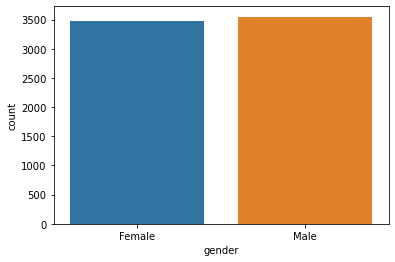

In [47]:
ax = sns.countplot(x='gender', data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

From the above observations the total number of male is 3549 and total number of female customer is 3483

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


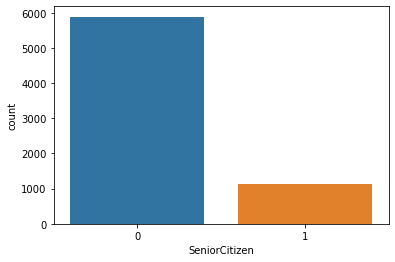

In [48]:
ax = sns.countplot(x='SeniorCitizen', data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

From the above observations the total number of Younger is 5890 and total number of Senior Citizen customer is 1142.

No     3639
Yes    3393
Name: Partner, dtype: int64


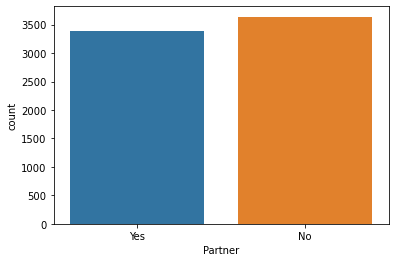

In [49]:
ax = sns.countplot(x='Partner', data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

From the above observations the total number of married customer is 5890 and tal number of Unmarried customer is 1142.

No     4933
Yes    2099
Name: Dependents, dtype: int64


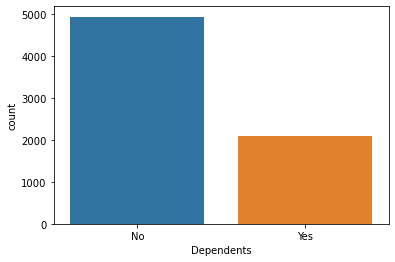

In [50]:
ax = sns.countplot(x='Dependents', data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

From the above observations the total number of Dependent customer is 2099 and total number of Independent customer is 4933

Yes    6352
No      680
Name: PhoneService, dtype: int64


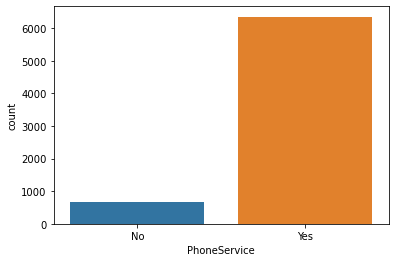

In [51]:
ax = sns.countplot(x='PhoneService', data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

From the above observations the total number of customer using Phone Service is 6352 and total number of customer not Using Phone Service is 680

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


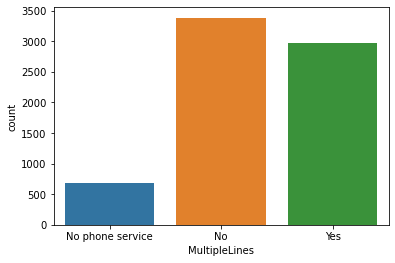

In [52]:
ax = sns.countplot(x='MultipleLines', data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

From the above observations the total number of customer using MultipleLines is 2967 and total number of customer not Using MultipleLines is 3385 and total number of customer have No phone Service is 680

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


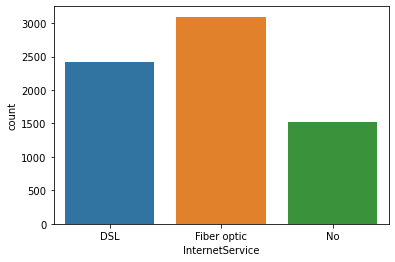

In [53]:
ax = sns.countplot(x='InternetService', data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

From the above observations the total number of customer using Fiber optics Internet Service is 3096, total number of customer Using DSL Internet Service is 2416 and total number of customer have No Internet Service is 1520

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


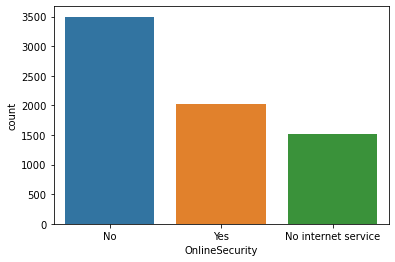

In [54]:
ax = sns.countplot(x='OnlineSecurity', data=df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

From the above observations the total number of customer using Online Security is 2015, total number of customer Not Using Online Security is 3497 and total number of customer have No Internet Service is 1520

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


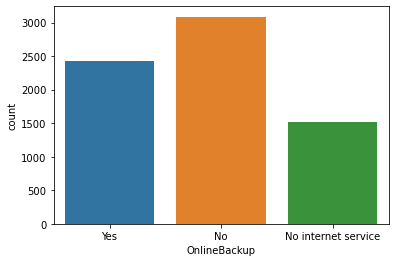

In [55]:
ax = sns.countplot(x='OnlineBackup', data=df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

From the above observations the total number of customer using Online Backup is 2425, total number of customer Not Using Online Backup is 3087 and total number of customer have No Internet Service is 1520

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


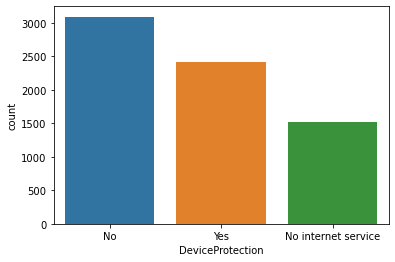

In [56]:
ax = sns.countplot(x='DeviceProtection', data=df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

From the above observations the total number of customer using Device Protection is 2418, total number of customer Not Using Device protection is 3094 and total number of customer have No Internet Service is 1520

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


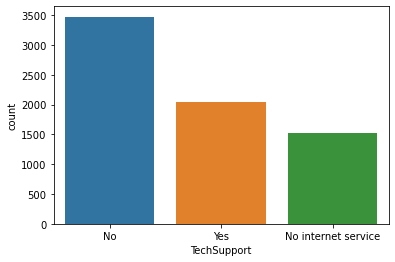

In [57]:
ax = sns.countplot(x='TechSupport', data=df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

From the above observations the total number of customer using Tech Support is 2040, total number of customer Not Using Tech Support is 3472 and total number of customer have No Internet Service is 1520

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


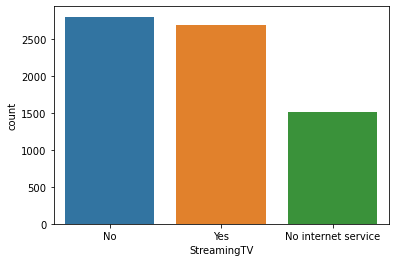

In [58]:
ax = sns.countplot(x='StreamingTV', data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

From the above observations the total number of customer using Streaming TV is 2703, total number of customer Not Using Streaming TV is 2809 and total number of customer have No Internet Service is 1520

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


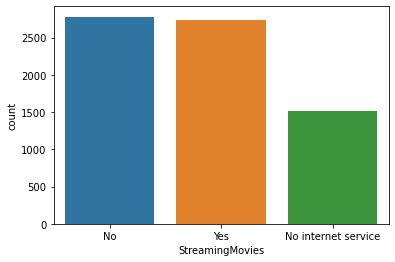

In [59]:
ax = sns.countplot(x='StreamingMovies', data=df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


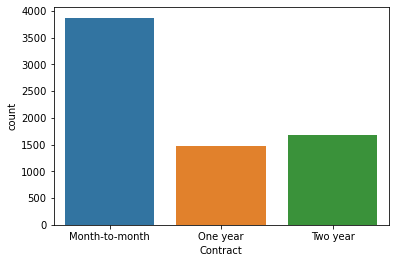

In [60]:
ax = sns.countplot(x='Contract', data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


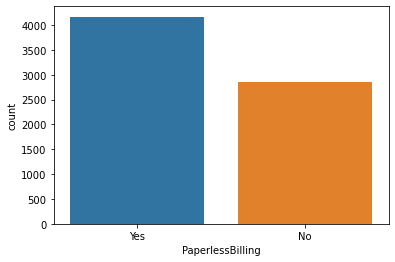

In [61]:
ax = sns.countplot(x='PaperlessBilling', data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


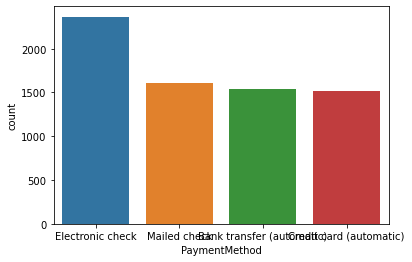

In [62]:
ax = sns.countplot(x='PaymentMethod', data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


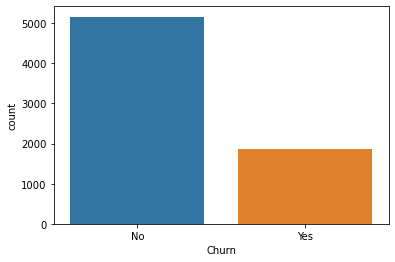

In [63]:
ax = sns.countplot(x='Churn', data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

For the ordinal Categorical data we will use lineplot as it will give the flow of the line of the classes of the columns:

# Making Dataframe of the ordinal Data

In [64]:
df_visualization_ordinal=df[["customerID","tenure"]].copy()

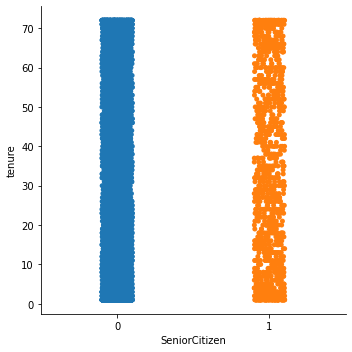

In [65]:
sns.catplot(x="SeniorCitizen", y="tenure", data=df)

# Checking the distribution of the continous value of the float type columns.

In [66]:
df_visualization_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

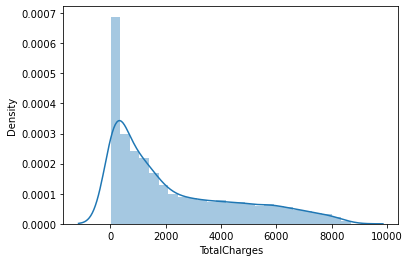

In [67]:
import seaborn as sns
sns.distplot(df_visualization_continuous['TotalCharges'], kde=True)

In [68]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

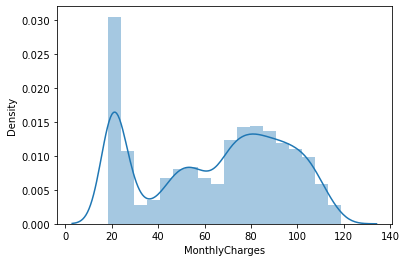

In [69]:
sns.distplot(df_visualization_continuous['MonthlyCharges'], kde=True)

Visualization part is completed

Since the dataset has a lot of string values. We will use the encoding techniques to convert the string data to numerical one

# Encoding of DataFrame:

Lable encoder only for target variable since it is not target variable so.

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [71]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [72]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Describe the dataset:

In [73]:
# only continuous columns
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customerID,7032.0,3515.500000,2030.107879,0.00,1757.7500,3515.500,5273.2500,7031.00
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00


<AxesSubplot:>

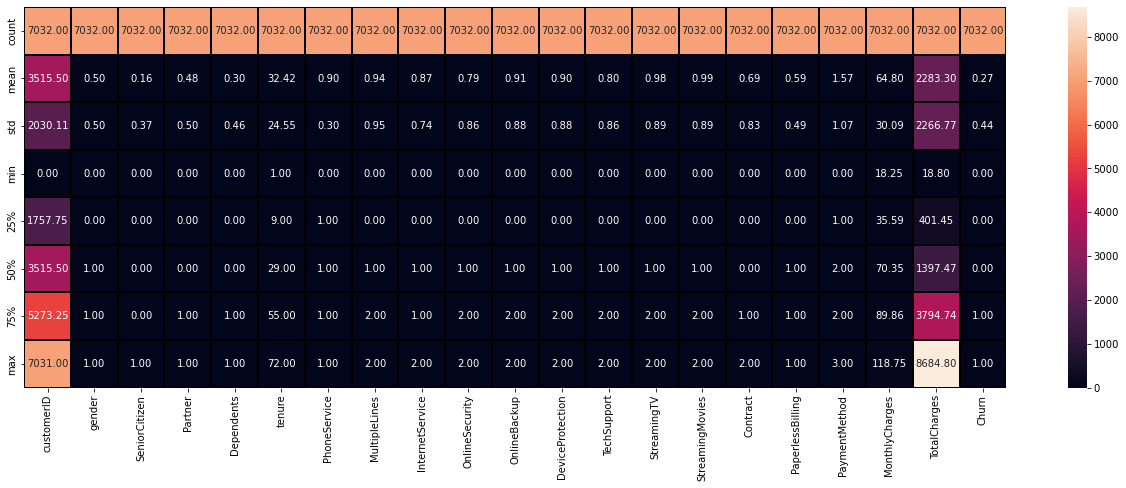

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

<AxesSubplot:>

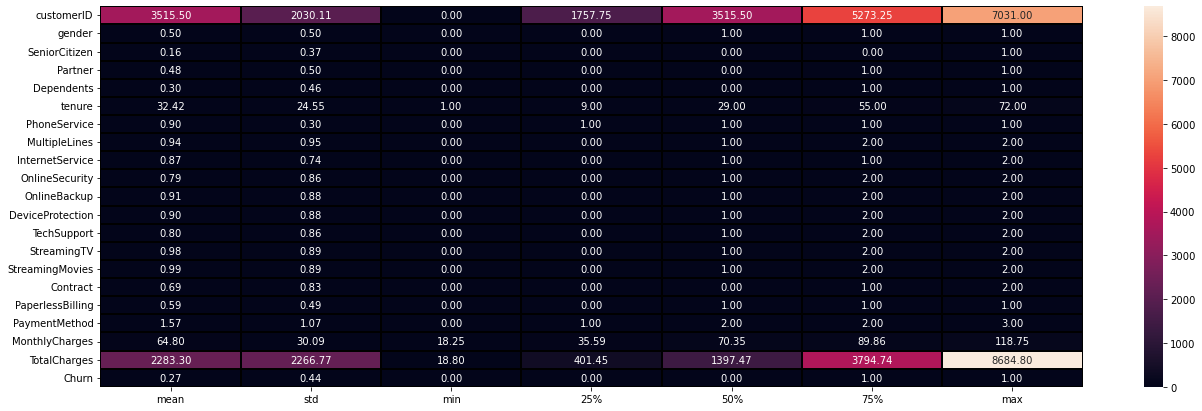

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation of the columns with the target columns:

In [77]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330594
Churn              -0.199484
InternetService    -0.175691
customerID         -0.000263
gender              0.000048
Dependents          0.064653
SeniorCitizen       0.102411
PhoneService        0.113008
PaperlessBilling    0.157830
OnlineSecurity      0.254473
TechSupport         0.276890
Partner             0.319072
OnlineBackup        0.375556
DeviceProtection    0.389066
StreamingTV         0.392472
StreamingMovies     0.398088
Contract            0.450306
MultipleLines       0.453202
MonthlyCharges      0.651065
tenure              0.825880
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

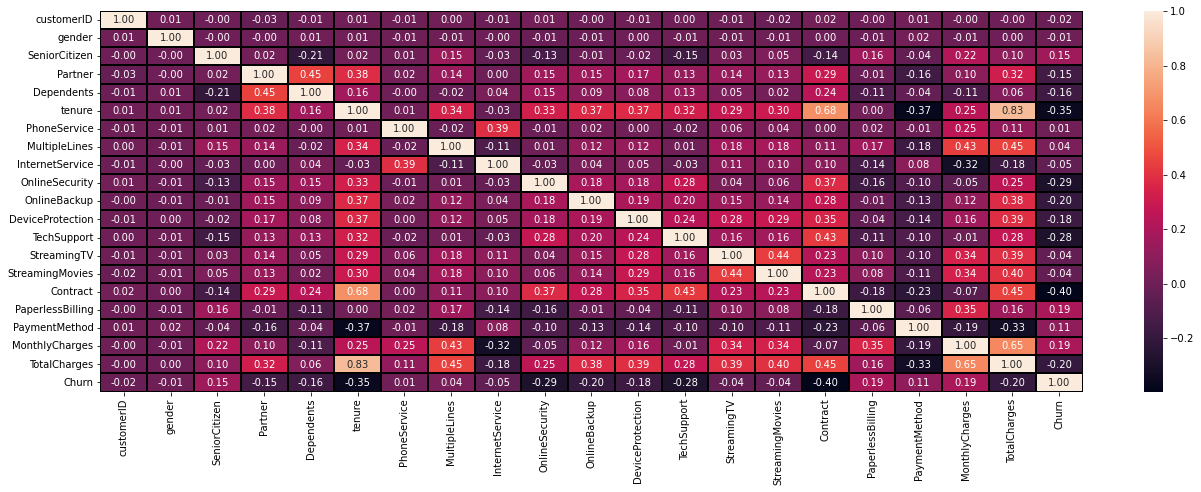

In [78]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negatively correlated with the target columns:

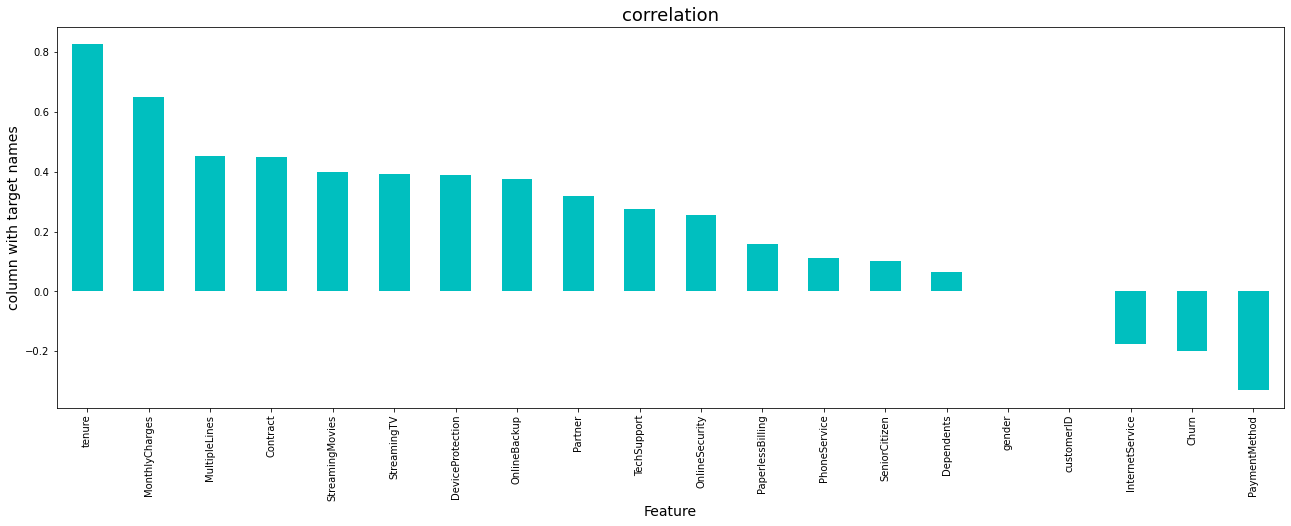

In [79]:
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [80]:
df.skew().sort_values()

PhoneService       -2.729727
PaperlessBilling   -0.377503
MonthlyCharges     -0.222103
PaymentMethod      -0.169388
gender             -0.018776
customerID          0.000000
StreamingMovies     0.013851
StreamingTV         0.029366
Partner             0.070024
MultipleLines       0.118623
OnlineBackup        0.184089
DeviceProtection    0.188013
InternetService     0.205704
tenure              0.237731
TechSupport         0.403966
OnlineSecurity      0.418619
Contract            0.635149
Dependents          0.880908
TotalCharges        0.961642
Churn               1.060622
SeniorCitizen       1.831103
dtype: float64

keeping +/-0.5 as the range for skewness, here are the columns which does not lie within this range.

- Senior Citizen-categorical
- Dependents-categorical
- Phone Service-catgorical
- Contract-categorical
- Total Charges-target variable
- Churn-categorical

Since no colum has skewness, we will not treat that

# Outlietrs check:

In [81]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

 Checking the outliers on the int and float type of column

<AxesSubplot:>

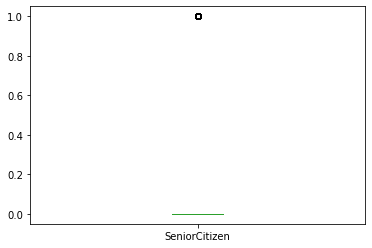

In [82]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

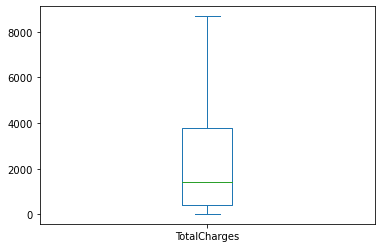

In [83]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

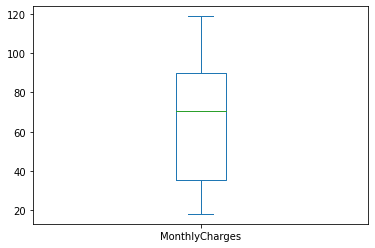

In [84]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

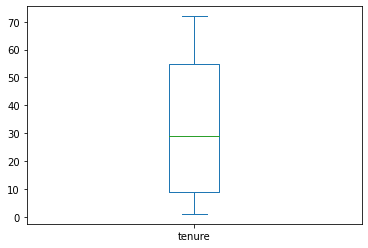

In [85]:
df['tenure'].plot.box()

In [86]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Since the column Senior Citizen is normal type, we cannot consider its data points as outlier.

# Considering the outlier removal

In [87]:
df.shape

(7032, 21)

In [88]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  494,  497,  543,
         568,  595,  609,  615,  619,  633,  659,  666,  668,  673,  676,
         687,  715,  717,  734,  763,  774,  782,  788,  792,  811,  827,
         841,  845,  857,  864,  871,  873,  875,  882,  891,  915,  932,
         938,  940,  957,  970, 1008, 1015, 1034, 1047, 1048, 1050, 1069,
        1106, 1115, 1118, 1140, 1142, 1146, 1157, 1165, 1178, 1200, 1217,
        1221, 1238, 1251, 1253, 1267, 1274, 1294, 1307, 1322, 1327, 1329,
        1330, 1344, 1347, 1360, 1374, 1397, 1402, 1411, 1447, 1474, 1475,
        1476, 1495, 1501, 1508, 1514, 1555, 1557, 1576, 1579, 1609, 1615,
        1629, 1632, 1647, 1684, 1687, 

In [89]:
df['PhoneService'].unique()

array([0., 1.])

In [90]:
# df_new_z=df[(z<3).all(axis=1)]
# df_new_z

In [91]:
# df_new_z.shape

In [92]:
## Percentage Loss of data:

In [93]:
# Data_loss=((7043-6361)/7043)*100

In [94]:
# Data_loss

Our data is becoming biased as it is not considering the case of Senior Citizens. Thus, we will not remove outliers.

# Separating the columns into features and target:

In [95]:
features=df.drop('TotalCharges',axis=1)
target=df['TotalCharges']

# Scaling the data using Min-Max Scaler:

In [96]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()    # for normalisation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.9078230851610491
At random state 0, the testing accuracy is:- 0.901935068181243


At random state 1, the training accuracy is:- 0.9079565858548316
At random state 1, the testing accuracy is:- 0.9008829074307736


At random state 2, the training accuracy is:- 0.9063273036929632
At random state 2, the testing accuracy is:- 0.907911065504217


At random state 3, the training accuracy is:- 0.9072540285854458
At random state 3, the testing accuracy is:- 0.9038939143430855


At random state 4, the training accuracy is:- 0.9085350497474927
At random state 4, the testing accuracy is:- 0.8983071339834157


At random state 5, the training accuracy is:- 0.9078141009722713
At random state 5, the testing accuracy is:- 0.9012496112418962


At random state 6, the training accuracy is:- 0.9065655306190831
At random state 6, the testing accuracy is:- 0.9067989147246636


At random state 7, the training accuracy is:- 0.9060680146120199
At random state 7, t

At random state 69, the testing accuracy is:- 0.9040100706365358


At random state 70, the training accuracy is:- 0.906046081675353
At random state 70, the testing accuracy is:- 0.9088551539046299


At random state 71, the training accuracy is:- 0.9064367331116586
At random state 71, the testing accuracy is:- 0.9074852203680155


At random state 72, the training accuracy is:- 0.9081816093421039
At random state 72, the testing accuracy is:- 0.9001530175165442


At random state 73, the training accuracy is:- 0.9056255340578607
At random state 73, the testing accuracy is:- 0.9105675410933818


At random state 74, the training accuracy is:- 0.9078484682138381
At random state 74, the testing accuracy is:- 0.9015413742690727


At random state 75, the training accuracy is:- 0.9056616797300472
At random state 75, the testing accuracy is:- 0.9105093922588008


At random state 76, the training accuracy is:- 0.9069274977651811
At random state 76, the testing accuracy is:- 0.9053256779739035


At 

In [99]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [100]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [101]:
pred_test=lr.predict(features_test)

In [102]:
print(r2_score(target_test,pred_test))

0.9046238705777878


# Cross-Validation of the model:

In [103]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")


At cross fold 2 the cv score is 0.9056853759998242 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 3 the cv score is 0.9060689054485596 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 4 the cv score is 0.906052281618998 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 5 the cv score is 0.9060785914102271 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 6 the cv score is 0.9061171892115527 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 7 the cv score is 0.9059910991780915 and accuracy score for training is -0.8612455915647186 and accuracy for the testing is 0.9046238705777878


At cross fold 8 the cv score is 0.9059336238398

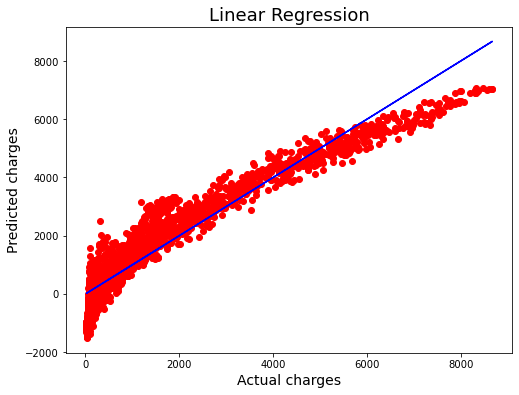

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [106]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .01, .1, 1, 10],
             'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [107]:
# final model training
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

90.708551259518

In [108]:
pred_ls =ls.predict(features_test)

In [109]:
lss = r2_score(target_test,pred_ls)
lss*100

90.45396929310161

In [110]:
cv_score=cross_val_score(ls,features,target,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

90.61289404064726

# Ensemble technique

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],
             'max_features':["auto", "sqrt", "log2"]}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [113]:
rf = RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
train_r2 = rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)
print('Training r2',train_r2)
rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9998209400458398
R2 Score: 99.87195301238117
Cross Val Score: 99.87686141012512


We are getting accuracy and cross validation both as 99.8% whichshows our model is performing extremely well.

In [117]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion

In [119]:
loaded_model = pickle.load(open('churn.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result*100)

99.87195301238117


In [120]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Original"])

In [122]:

conclusion

,0,1,2,3,4,5,6,7,8,9,...,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406
Predicted,1725.30125,322.655,910.887,18.908,227.9905,3035.385,866.4785,1583.50675,96.219,2383.8685,...,4569.404,7820.203,2582.5535,3649.7765,41.731,144.464,3131.2265,6296.6885,921.7205,489.446
Original,1725.30125,322.655,910.887,18.908,227.9905,3035.385,866.4785,1583.50675,96.219,2383.8685,...,4569.404,7820.203,2582.5535,3649.7765,41.731,144.464,3131.2265,6296.6885,921.7205,489.446
